# Project 2
Mitchell Morrison and Christian Gould

We have decided to use the COVID 19 dataset in pair with a dataset of holidays and their dates around the world. We plan on enriching the COVID dataset by showing the relationship between the period following a holiday and the level of covid in the country celebrating. The COVID dataset was gathered for the purpose of testing it in conjunction with holiday data. 

Dataset links:
1. https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide
2. https://www.kaggle.com/vbmokin/covid19-holidays-of-countries?select=holidays_df_of_70_countries_for_covid_19.csv

# Part 1 - Getting Started
Import libraries
Load original Data (which ever one you chose from the provided list) into a data frame.
Load your additional data set(s) into a data frame.
In a markdown cell, provide a brief description of your the data sets you've chosen to work with.
Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section.

# Part 2 - Data Inspection
Write some code to summarize the datasets. Think about the following questions:

What type of data is each variable? (think like a data scientist here, not a computer scientist)<br>
What is the total size of the data sets?<br>
What time boundaries are there in the dataset? IOW, what time frame do they span?<br>
Are there any missing values in any of the variables?<br>
Do this with Intentionality. Don't skimp.<br>

In [172]:
import numpy as np
import pandas as pd

## Understanding our datasets

### Holidays dataset

In [173]:
holidays = pd.read_csv('datasets/holidays_df_of_70_countries_for_covid_19.csv')
holidays.head()

,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
0,2020-02-24,Día de Carnaval [Carnival's Day],2020-03-02,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
1,2020-02-25,Día de Carnaval [Carnival's Day],2020-03-03,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
2,2020-03-24,Día Nacional de la Memoria por la Verdad y la ...,2020-03-31,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
3,2020-04-09,Semana Santa (Jueves Santo) [Holy day (Holy T...,2020-04-16,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
4,2020-04-10,Semana Santa (Viernes Santo) [Holy day (Holy ...,2020-04-17,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays


In [174]:
holidays.columns

Index(['ds_holidays', 'holiday', 'ds', 'country', 'code',
       'country_official_name', 'lower_window', 'upper_window', 'prior_scale',
       'source'],
      dtype='object')

In [175]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ds_holidays            806 non-null    object
 1   holiday                806 non-null    object
 2   ds                     806 non-null    object
 3   country                806 non-null    object
 4   code                   806 non-null    object
 5   country_official_name  806 non-null    object
 6   lower_window           806 non-null    int64 
 7   upper_window           806 non-null    int64 
 8   prior_scale            806 non-null    int64 
 9   source                 806 non-null    object
dtypes: int64(3), object(7)
memory usage: 63.1+ KB


All holidays are in a Date string format and the countries and country codes are all strings. The lower and upper window variables are ints. 

In [176]:
holidays.describe()

,lower_window,upper_window,prior_scale
count,806.0,806.0,806.0
mean,-3.0,3.0,10.0
std,0.0,0.0,0.0
min,-3.0,3.0,10.0
25%,-3.0,3.0,10.0
50%,-3.0,3.0,10.0
75%,-3.0,3.0,10.0
max,-3.0,3.0,10.0


This .describe means nothing to us because all the columns of interest are categorical. We are really only using this table to gather the holidays dates and the corresponding country where the holiday is celebrated.

In [177]:
min(holidays.ds), max(holidays.ds)

('2020-01-28', '2021-01-07')

The holidays dataset ranges in dates from Jan 28th 2020 to Jan 7th 2021.

### COVID 19 dataset

In [178]:
covid = pd.read_csv('datasets/owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [179]:
columnsOfInterest = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million']
covid[columnsOfInterest]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,0.126,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
153167,ZWE,Africa,Zimbabwe,2022-01-04,217678.0,1591.0,1447.143,5078.0,31.0,14423.240,105.419,95.887
153168,ZWE,Africa,Zimbabwe,2022-01-05,219057.0,1379.0,1644.143,5092.0,14.0,14514.612,91.372,108.940
153169,ZWE,Africa,Zimbabwe,2022-01-06,220178.0,1121.0,1207.143,5108.0,16.0,14588.889,74.277,79.985
153170,ZWE,Africa,Zimbabwe,2022-01-07,221282.0,1104.0,1146.286,5136.0,28.0,14662.039,73.151,75.952


In [180]:
covid = covid[columnsOfInterest]

In [181]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153172 entries, 0 to 153171
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   iso_code                        153172 non-null  object 
 1   continent                       143944 non-null  object 
 2   location                        153172 non-null  object 
 3   date                            153172 non-null  object 
 4   total_cases                     150522 non-null  float64
 5   new_cases                       150431 non-null  float64
 6   new_cases_smoothed              149280 non-null  float64
 7   total_deaths                    133279 non-null  float64
 8   new_deaths                      133441 non-null  float64
 9   total_cases_per_million         149820 non-null  float64
 10  new_cases_per_million           149729 non-null  float64
 11  new_cases_smoothed_per_million  148583 non-null  float64
dtypes: float64(8), o

In [182]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
count,1.505220e+05,1.504310e+05,1.492800e+05,1.332790e+05,133441.000000,149820.000000,149729.000000,148583.000000
mean,2.140423e+06,8.514960e+03,8.362923e+03,5.286023e+04,170.514032,23484.220297,107.848851,104.305831
std,1.268426e+07,5.147776e+04,4.782771e+04,2.779311e+05,831.031112,38303.228732,376.402439,253.818949
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,0.001000,-3125.829000,-272.971000
25%,1.581250e+03,1.000000e+00,5.857000e+00,6.800000e+01,0.000000,514.036750,0.023000,1.444000
50%,2.077650e+04,7.000000e+01,9.200000e+01,6.770000e+02,2.000000,4015.258000,10.076000,15.922000
75%,2.566742e+05,9.250000e+02,9.758927e+02,6.467500e+03,19.000000,30741.449500,86.812000,99.436000
max,3.051916e+08,2.879121e+06,2.265658e+06,5.484782e+06,18062.000000,341391.525000,51427.491000,7842.850000


This .describe function explains to us many variables related to the cases counts in many locations. However, this data does not give light to many of the different countries and the scale of the differences in their values.

In [183]:
min(covid.date), max(covid.date)

('2020-01-01', '2022-01-08')

In [184]:
covid.isna().sum()

iso_code                              0
continent                          9228
location                              0
date                                  0
total_cases                        2650
new_cases                          2741
new_cases_smoothed                 3892
total_deaths                      19893
new_deaths                        19731
total_cases_per_million            3352
new_cases_per_million              3443
new_cases_smoothed_per_million     4589
dtype: int64

In [185]:
covid[covid["location"] == "Albania"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
1381,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TODO: Make comments about empty nesss

## Questions to answer
1. Is there a relationship between a country's holidays and COVID cases the week following?
2. Based on the previous question, which countries are best at mitigating new cases following holidays?
3. Which holidays have the worst effect of COVID cases?

## Merging our datasets
### We will merge these two dataframes using a left join on the COVID table with the country and date attributes
It may also work to use an inner join to only keep days that are holidays and the window of transmission that we are interested in

# Part 3

* Create a data description (data dictionary) for your data sets.
* Describe each variable
* If categorical, what levels are present? If the levels are encoded, what do the codes mean?
* If numeric, provide min, max, median and any other univariate stats you'd like to add in.
* Where appropriate, provide histograms or other visualizations to characterize each variable.

### What are our variables from the holiday dataset?

* ds_holidays - date of the holiday
* date format - YYYY-MM-DD
* holiday - name of the holiday
    ex. Christmas
* ds - ds_holidays plus time delta of 7 days
* country - country of holiday
* code - conutry abbreviation
* country_official_name - formal country name
* lower_window - ds minus time delta of 3 days (early COVID onset boundary)
* upper_window - ds plus time delta of 3 days (late COVID onset boundary)
* prior_scale -
* source - where holiday data is retrieved from

Of these, we are only interested in: country, ds, ds_holidays

This is because we are only interested in the dates of the holidays and the country that the holiday is in. ds is not necessary, but is helpful in order for us to check dates that are a week away from the holiday.
Here is the range of the dates in the holiday set:

### Variables from COVID dataset

Wow, our COVID dataset has a ton of columns!! Lets narrow it down to only columns that are related to transmission and testing results. <br>
These columns are:
<list>
    <li> iso_code - country code
    <li> continent - exactly what you think
    <li> location - country name
    <li> date - date of record for instance
    <li> total_cases - total covid cases for the country
    <li> new_cases - new cases this day
    <li> new_cases_smoothed - new cases smoothed over 7 day period
    <li> total_deaths - total deaths for the country
    <li> new_deaths - new deaths this day
    <li> total_cases_per_million - ratio of total cases to million of population
    <li> new_cases_per_million - ratio of new cases today to million of population
    <li> new_cases_smoothed_per_million - ratio of new cases smoothed over 7 day period to million of population
    <li> reproduction_rate - real time estimate of transmission factor of covid

# Part 4 - Merging

To merge our COVID 19 and Holiday datasets, we need to know what columns will be used to join upon and what type of join we should use depending on the Key columns. In our case the COVID 19 dataset uses attributes location and date as the unique identifiers for each instance of data. Similarly, the Holidays dataset uses the country and ds_holidays to indicate unique holidays for each country and the date(s) it falls on.

Since we will be using the COVID dataset in conjunction with holidays and more specifically, the covid data following holidays, we want to keep all instances of COVID data even if a holiday does not fall on that day of the row exactly. And since every holiday must fall on a day of the year, all of the rows in holidays will be joined on their respective row in the COVID dataset. Given that we want to keep all the COVID data, we are using a left join on the COVID table. This will however mean that there will be lots of NaN values in the holiday related columns of the new merged dataset because there is far more days in a year than holidays in a year. After all, holidays wouldn't be special if they were every day.

In [186]:
merged_df = pd.merge(covid, holidays,  how='left', left_on=['location','date'], right_on = ['country','ds_holidays'])


In [187]:
merged_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
merged_df[merged_df["location"] == "Albania"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
1381,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
negative_cases = merged_df[merged_df["new_cases"] < 0]
negative_cases[negative_cases["iso_code"] == "GBR"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
144530,GBR,Europe,United Kingdom,2021-04-09,4369512.0,-4860.0,1684.857,127126.0,60.0,64062.409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144569,GBR,Europe,United Kingdom,2021-05-18,4454451.0,-2364.0,1529.000,127777.0,7.0,65307.718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
GBR_data = merged_df[merged_df["iso_code"] == "GBR"] 
GBR_data[GBR_data["date"].between("2021-04-01", "2021-04-11")]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
144522,GBR,Europe,United Kingdom,2021-04-01,4354316.0,4479.0,4448.857,126850.0,51.0,63839.616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144523,GBR,Europe,United Kingdom,2021-04-02,4357718.0,3402.0,4051.000,126902.0,52.0,63889.494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144524,GBR,Europe,United Kingdom,2021-04-03,4361141.0,3423.0,3987.857,126912.0,10.0,63939.679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144525,GBR,Europe,United Kingdom,2021-04-04,4363438.0,2297.0,3764.286,126922.0,10.0,63973.356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144526,GBR,Europe,United Kingdom,2021-04-05,4366200.0,2762.0,3494.000,126948.0,26.0,64013.851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144527,GBR,Europe,United Kingdom,2021-04-06,4368580.0,2380.0,3256.429,126968.0,20.0,64048.744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144528,GBR,Europe,United Kingdom,2021-04-07,4371342.0,2762.0,3072.143,127013.0,45.0,64089.239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144529,GBR,Europe,United Kingdom,2021-04-08,4374372.0,3030.0,2865.143,127066.0,53.0,64133.662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144530,GBR,Europe,United Kingdom,2021-04-09,4369512.0,-4860.0,1684.857,127126.0,60.0,64062.409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144531,GBR,Europe,United Kingdom,2021-04-10,4372096.0,2584.0,1565.000,127166.0,40.0,64100.293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 5 - Explore Bivariate relationships

* Choose a reasoned set of variables to explore further. You don't have to explore all possible pairs of variables, nor do we want to grade that much. Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables).
* List your predictor variables
* List your target variable
* Briefly describe why you have chosen these.
* Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable. Which of the predictor variables are most strongly related? Are there any interesting relationships between categorical predictors and numeric predictors? If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative?
* Below each plot, you should provide a description and interpretation of the plot. Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well.

To explore the relationships between our variables and to answer the questions we have defined in part 1, we need to define what our prdictor and target variables are.

Out target variables are the columns new_cases and new_cases_per_million. This is because we are trying to uncover relationships between our other variables and the COVID cases the following week. Using new_cases_per_million as a target variable will let us more accurately compare results across different countries since their sizes/populations are different. We will also just use new_cases because this will also give us meaningful information (with respect to the country that the data belongs).

We will use the holiday dates from the holiday dataset as our main relationship variable. This is because we are trying to explore the relationship between holidays and COVID spikes following that day. Other predictor variables include the country and previous new_cases. Our variables are not predictors, we are trying to explore the relationship between these target and "predictors".

We have chosen the date of the holiday and the country as the predictors because these variables are specific to the COVID data we have been given and thus can only explore the relationship we see between dates, country, and cases. From the last few years, it has become clear that we cannot predict COVID just using the previous new_cases data, similar to how stocks cannot be predicted using historical prices. 

### We need to reduce our tables to usable data

We need to get rid of all instances of country COVID data that do not exist in the holiday table.

In [191]:
countryGroups = merged_df.groupby('location')
for k, v in countryGroups:
    if all(v["holiday"].isnull()):
        merged_df.drop(merged_df[merged_df['location'] == k].index, inplace = True)
merged_df["location"].unique()

array(['Albania', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Burundi', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Czechia', 'Denmark',
       'Dominican Republic', 'Egypt', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Moldova', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Norway', 'Pakistan', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States'],
      dtype=object)

We also need to drop rows that do not have COVID case data

In [192]:
merged_df.dropna(subset=["new_cases"], inplace=True)

In [193]:
merged_df[merged_df["location"] == "Albania"].head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
1394,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,0.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,3.481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,4.177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,8.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,11.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,ALB,Europe,Albania,2020-03-14,38.0,5.0,5.429,1.0,0.0,13.227,...,2020-03-14,Summer Day,2020-03-21,Albania,AL,Republic of Albania,-3.0,3.0,10.0,https://en.wikipedia.org/wiki/Public_holidays_...
1400,ALB,Europe,Albania,2020-03-15,42.0,4.0,6.000,1.0,0.0,14.619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,ALB,Europe,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,17.752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,ALB,Europe,Albania,2020-03-17,55.0,4.0,6.429,1.0,0.0,19.144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,ALB,Europe,Albania,2020-03-18,59.0,4.0,6.714,2.0,1.0,20.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First relationship exploration - Holidays and COVID cases 7 days later

First we will explore how holidays and COVID cases are related 7 days later for each country.

In [194]:
from datetime import timedelta

merged_df["7_days_later"] = merged_df["date"].shift(-7)
merged_df["7_days_later_cases"] = np.nan

merged_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source,7_days_later,7_days_later_cases
1394,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,0.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN
1395,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,3.481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-17,NaN
1396,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,4.177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18,NaN
1397,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,8.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19,NaN
1398,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,11.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-20,NaN


### The cell below has been commented out
The cell below takes about 5 minutes to run, so rather than having you wait we will read in the new dataframe from a file instead of creating it here. 

In [211]:
# %%time
# merged_df["7_days_later_cases"].fillna(0, inplace=True)
# for row in merged_df.iterrows():
#     new_cases = merged_df.loc[merged_df["date"] == row[1]["7_days_later"]]
#     new_cases = new_cases.loc[merged_df["location"] == row[1]["location"]]
# #     print(new_cases["new_cases"])
#     if len(new_cases["new_cases"]) == 1:
#         merged_df.at[row[0], "7_days_later_cases"] = new_cases["new_cases"] 
#     else:
#         print(row[0], " Not float type")

In [197]:
new_df = pd.read_csv('datasets/prepped_covid_data.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46018 entries, 0 to 46017
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      46018 non-null  int64  
 1   iso_code                        46018 non-null  object 
 2   continent                       46018 non-null  object 
 3   location                        46018 non-null  object 
 4   date                            46018 non-null  object 
 5   total_cases                     46018 non-null  float64
 6   new_cases                       46018 non-null  float64
 7   new_cases_smoothed              45683 non-null  float64
 8   total_deaths                    44607 non-null  float64
 9   new_deaths                      44598 non-null  float64
 10  total_cases_per_million         46018 non-null  float64
 11  new_cases_per_million           46018 non-null  float64
 12  new_cases_smoothed_per_million  

This table above has a new column "7_days_later_cases" that was made from the commented out cell. We read this in from a file to save you time waiting.

In [198]:
merged_df["7_days_later_cases"].fillna(0, inplace=True)
merged_df["new_cases"].fillna(0, inplace=True)

new_df["pct_change"] = (new_df["7_days_later_cases"] - new_df["new_cases"]) / abs(new_df["new_cases"]) * 100

In [199]:
new_df['date'] = pd.to_datetime(new_df['date'])

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46018 entries, 0 to 46017
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      46018 non-null  int64         
 1   iso_code                        46018 non-null  object        
 2   continent                       46018 non-null  object        
 3   location                        46018 non-null  object        
 4   date                            46018 non-null  datetime64[ns]
 5   total_cases                     46018 non-null  float64       
 6   new_cases                       46018 non-null  float64       
 7   new_cases_smoothed              45683 non-null  float64       
 8   total_deaths                    44607 non-null  float64       
 9   new_deaths                      44598 non-null  float64       
 10  total_cases_per_million         46018 non-null  float64       
 11  ne

## Plots and data exploration
### Answering our question 1: Is there a relationship between holidays occuring and COVID spikes 1-2 weeks following?
For example, lets take a look at COVID cases the week of and after the christmas season in the United States. We will start by plotting christmas day and the next 2 weeks after.

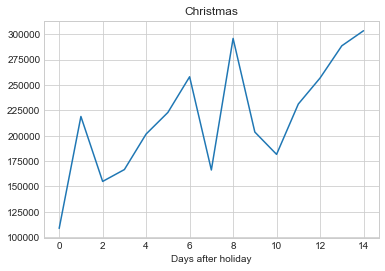

In [200]:
US_data = new_df[new_df["location"] == "United States"]
christmas_day = US_data[US_data["holiday"] == "Christmas Day"]

for row in christmas_day.iterrows():
    period = US_data[US_data["date"].between(row[1]["date"], row[1]["date"] + timedelta(days=14))]
    plt.plot(range(len(period["date"])), period["new_cases"])
    plt.xlabel('Days after holiday')
    plt.title("Christmas")


Based on this example using COVID data the weeks following Christmas Day, we can see that plotting the data around each holiday helps us get a better understanding of the rising covid trends. The variables we have used in this plot include the datetime series from the start of the holiday to two weeks later on the X-axis, and the new_cases variable makes the y-axis. 

Let's do this again with the remaining holidays in the US. 

[nan "Washington's Birthday" 'Memorial Day' 'Independence Day (Observed)'
 'Independence Day' 'Labor Day' 'Columbus Day' 'Veterans Day'
 'Thanksgiving' 'Christmas Day']


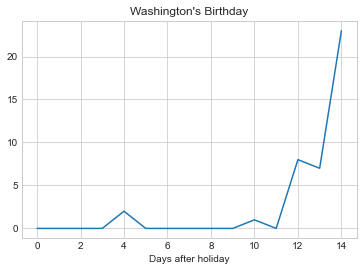

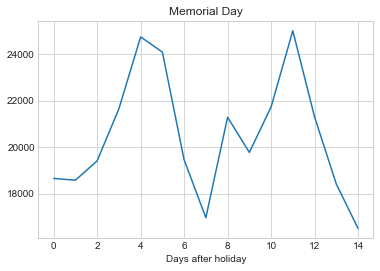

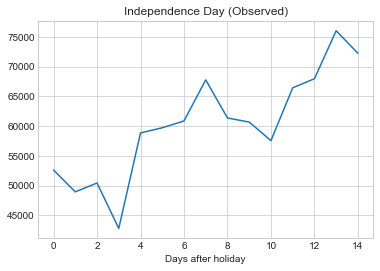

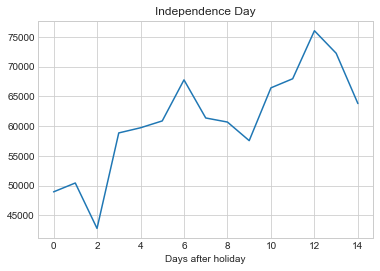

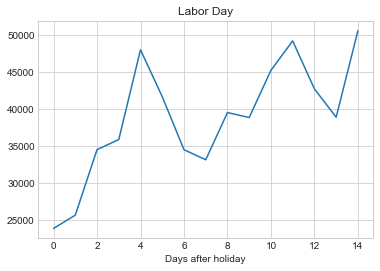

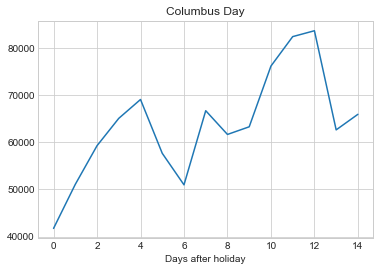

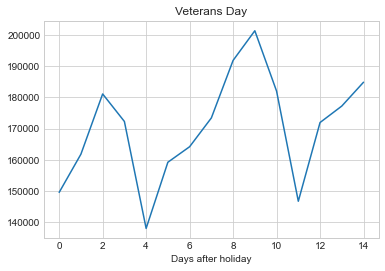

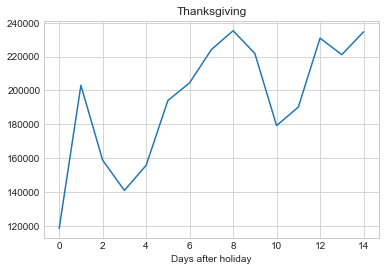

In [201]:
# lets do the same for all other US holidays

US_data = new_df[new_df["location"] == "United States"]
US_holidays_data = US_data[US_data["location"] == "United States"]
holidays = US_holidays_data["holiday"].unique()
print(holidays)
holidays = np.delete(holidays, np.argwhere(holidays == "Christmas Day"))
US_holidays_data
for holiday in holidays:
    for row in US_holidays_data.loc[US_holidays_data["holiday"] == holiday].iterrows():
        period = US_data[US_data["date"].between(row[1]["date"], row[1]["date"] + timedelta(days=14))]
        plt.plot(range(len(period["date"])), period["new_cases"])
        plt.xlabel('Days after holiday')
        plt.title(holiday)
        plt.show()

Looking at the trends from each of the plots we can tell we are on the right track trying to uncover if there is a relationship between a holiday occuring and a spike in covid cases the following weeks. In these plots above the variables are the same for that of the X and Y axis as those from the last plots on Christmas day. Now that we are sure there is some relationship between the two variables, we are going to explore this further by looking at larger collections of data, not unique to specific holidays in one place. We want to uncover larger relationships at a global level to draw conclusions about holidays influence on COVID spikes as a whole.

Given the analysis and plots we have now seen, we are confident there is a positive relationship between US holiday events and COVID spikes following the holiday. The exceptions to this based on these plots is Memorial day, which if you can recall COVID seemed to be fading away, and we were getting excited about the prospect of losing COVID. Then Delta hit. The other is Washington's birthday, which shows a massive spike following the holiday but if you look closely at the y-axis the quantity of cases is in the 10's not 1000's. 

## Answering question 2: Based on the previous question, which countries are best at mitigating new cases following holidays?

/Library/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Country x Average Percent Change'}, xlabel='location'>

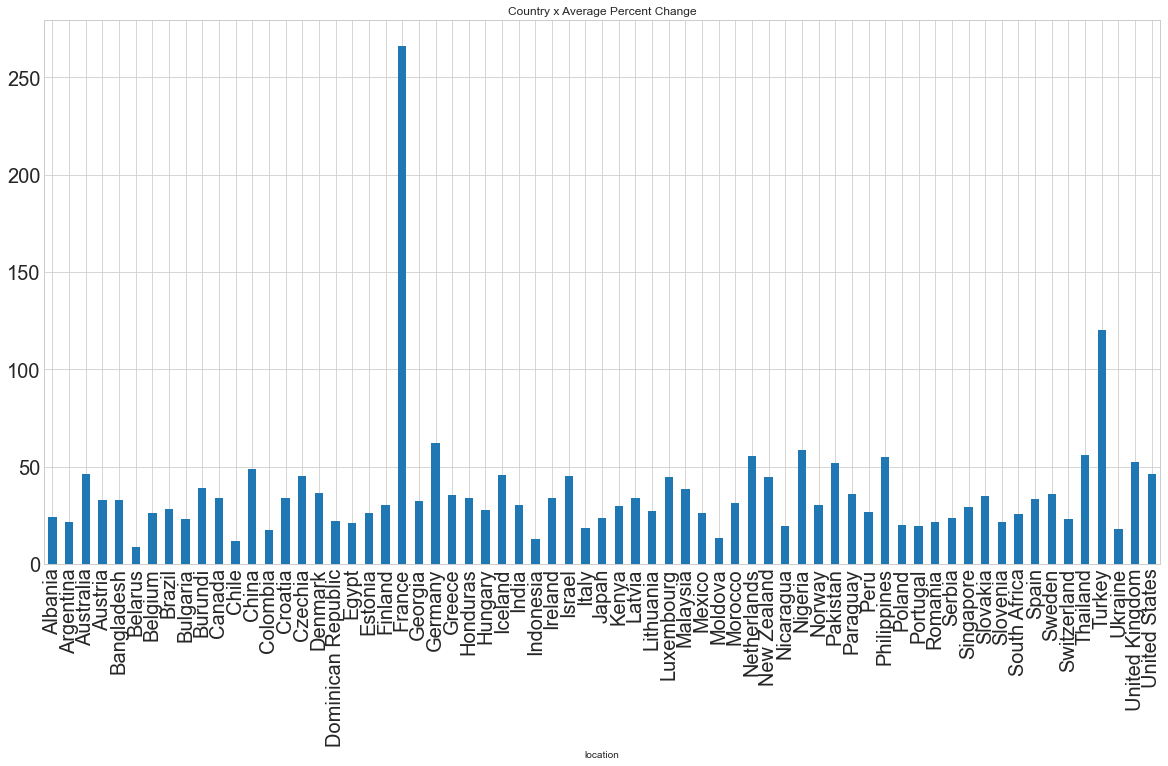

In [202]:
# take the average percent change one week after for each country
# Plot that in a bar chart for each country

# Group new_df by location
location_and_pct_change = new_df[["location", "pct_change"]]

# remove Nan values
location_and_pct_change.dropna(subset=["pct_change"], inplace=True)
# remove infinite values
location_and_pct_change = location_and_pct_change[~location_and_pct_change.isin([np.inf, -np.inf]).any(1)]
location_and_pct_change = location_and_pct_change.groupby("location").mean()
location_and_pct_change.head(10000)

# plot it, with a title "coolest countries", and a large plot size, and labeled with "average percent change"
location_and_pct_change.plot(kind="bar", title="Country x Average Percent Change", figsize=(20,10), legend=False, fontsize=20)

<AxesSubplot:title={'center':'Country x Average Percent Change'}, xlabel='location'>

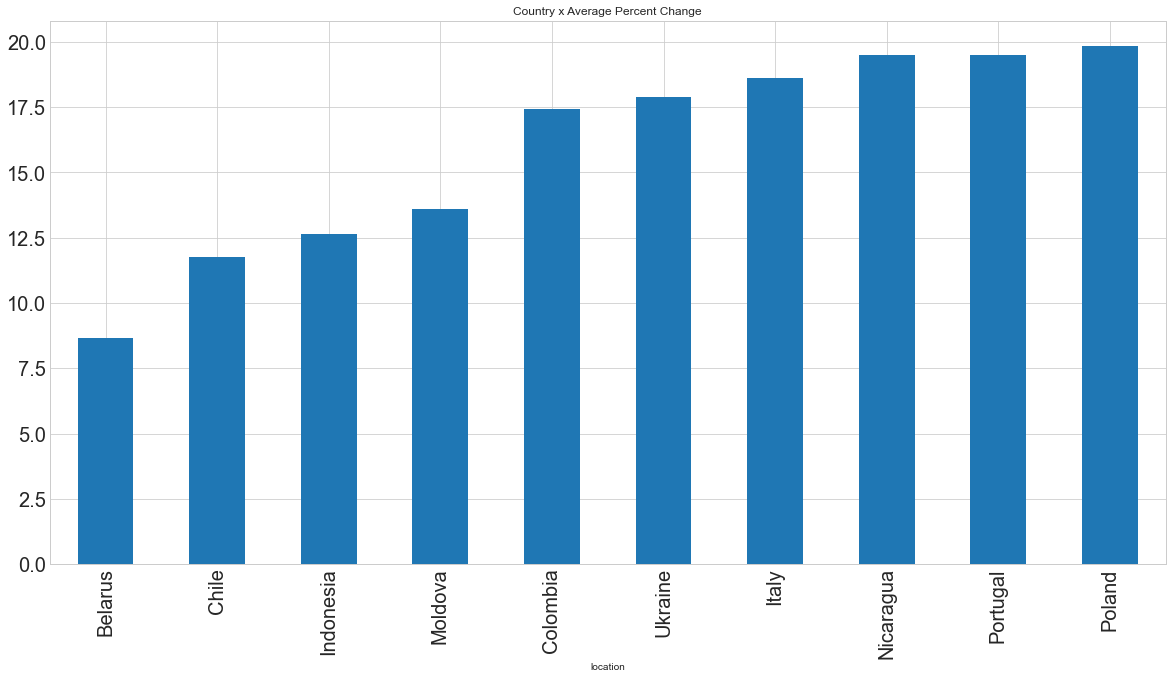

In [203]:
# Plot the bottom 10 countries by average percent change
location_and_pct_change.nsmallest(10, "pct_change").plot(kind="bar", title="Country x Average Percent Change", figsize=(20,10), legend=False, fontsize=20)

We can see that the least affected countries by holidays are:
* Belarus
* Chile
* Indonesia
* Moldova
* Colombia
* Italy
* Ukraine
* Portugal
* Nicaragua
* Poland

These countries (for the most part) are in more rural areas and thus have less travel. This would make sense as to why they would be less affected by holiday COVID spikes.

<AxesSubplot:xlabel='location'>

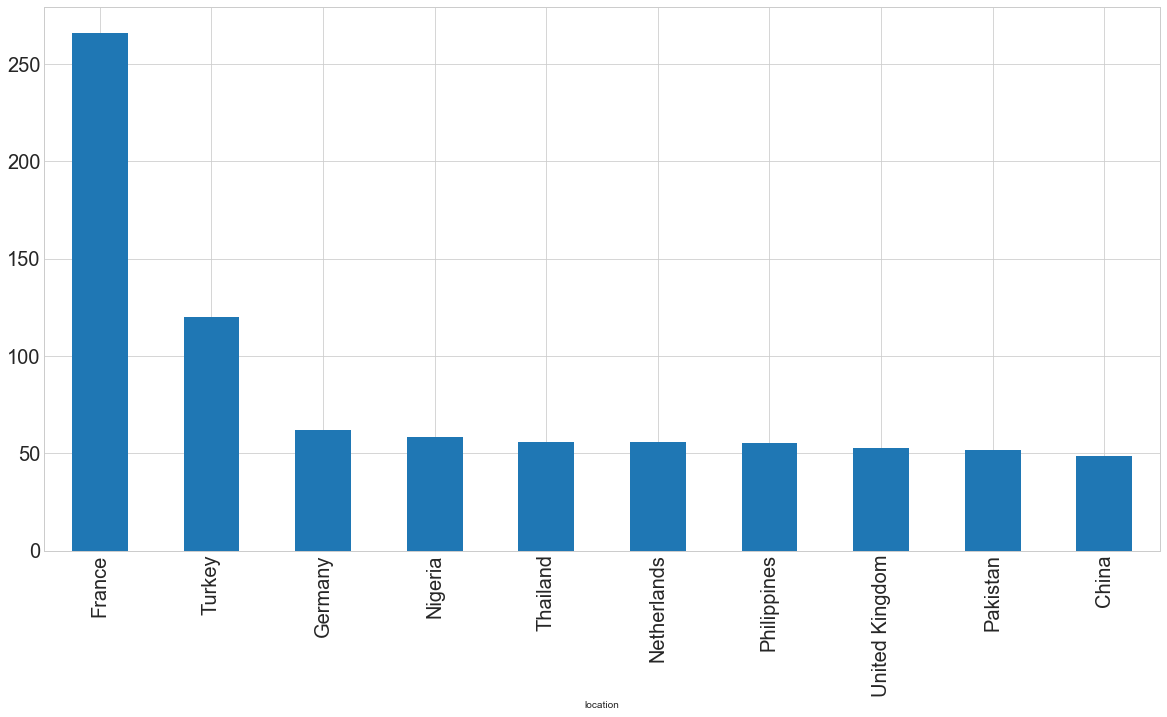

In [205]:
# Plot the top 10 countries by average percent change
location_and_pct_change.nlargest(10, "pct_change").plot(kind="bar", title="", figsize=(20,10), legend=False, fontsize=20)

We can see that the most-affected countries by holidays are:
* France
* Turkey
* Nigeria
* Netherlands
* Pakistan
* United Kingdom
* Thailand
* Germany
* Australia
* Philipines

These locations are either very urban, or are very closely compacted with people. This would make sense as to why they would be more affected by holiday COVID spikes, as they are places with larger populations and a whole lot of people traveling in and out of the country.

One factor that has been skewing the percentage changes from our variables is that early into the reporting of covid data the case counts were extremely small, i.e. below 100. And an increase from 2 new cases to 10 new cases shows as a 500% increase. For this reason, the average percent increase shown for a country like France indicates that the early covid data spikes following holidays were small in quantity but large in growth. 

## Answering question 3: What holidays resulted in the largest and smallest increases in COVID cases 1-2 weeks following? 

In [206]:
holiday_and_pct_change = new_df[["holiday", "pct_change", 'location']]
# Drop NaN values for holiday and pct_change
holiday_and_pct_change.dropna(subset=["pct_change", 'holiday'], inplace=True)
# find how many holidays are repeated
print(holiday_and_pct_change['holiday'].value_counts())

Christmas Day                                       16
Eid al-Fitr                                         13
Independence Day                                    12
Good Friday                                         10
Hanukkah                                             8
                                                    ..
Mindenszentek                                        1
Corpo de Deus                                        1
Día de la Hispanidad                                 1
Nationalfeierdag                                     1
Día de la Revolución [Revolution Day] (Observed)     1
Name: holiday, Length: 549, dtype: int64


/Library/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


From this, we can see that there are some holidays that are celebrated in more than one country, such as Christmas. We will take the average percentage change from these holidays. 

<AxesSubplot:xlabel='holiday'>

/Library/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24565 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarni

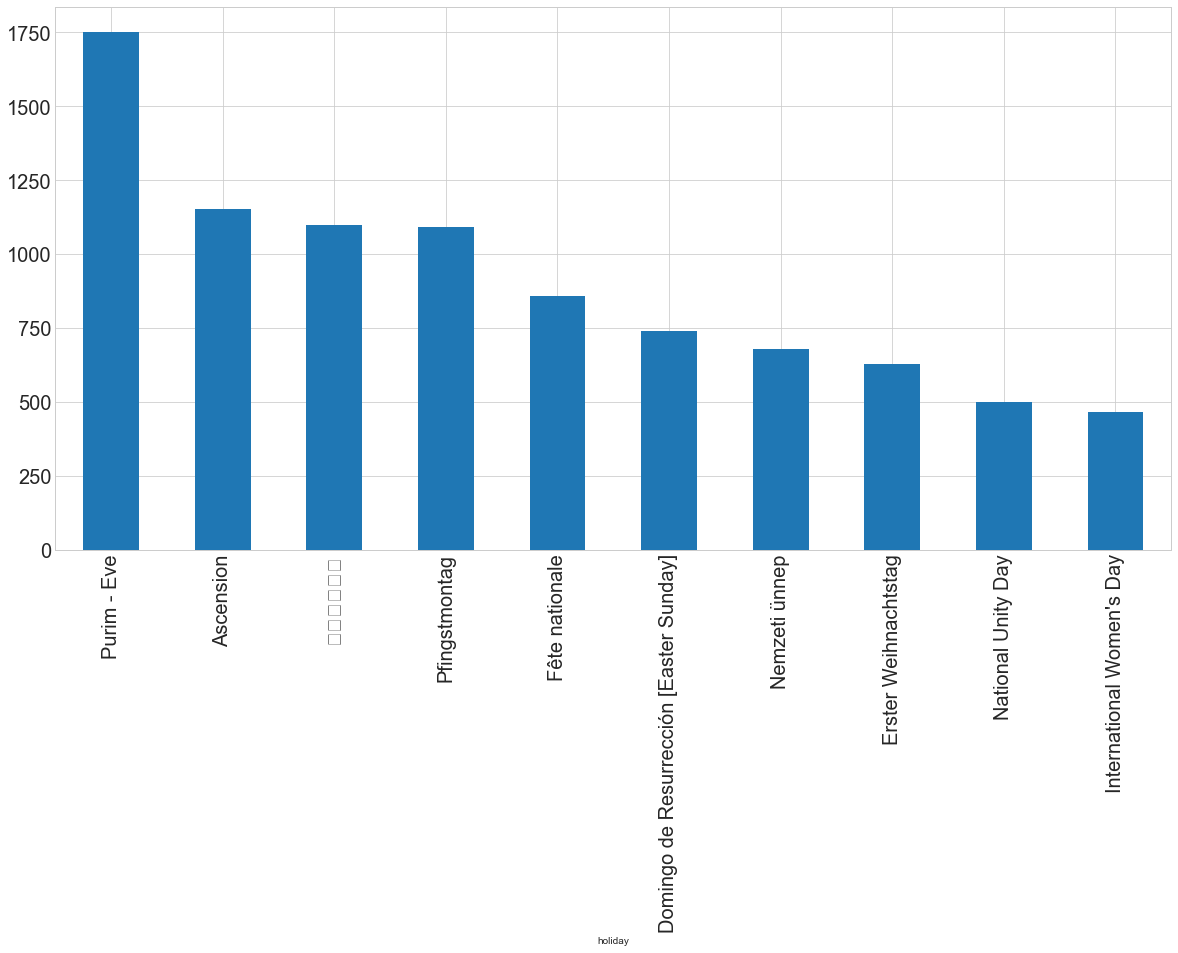

In [207]:
holiday_and_pct_change = holiday_and_pct_change[~holiday_and_pct_change.isin([
                                                                               np.inf, -np.inf]).any(1)]
holiday_and_pct_change = holiday_and_pct_change.groupby("holiday").mean()

holiday_and_pct_change.head(10000)

# Plot the top 10 holidays by average percent change, and add their dates to the x axis
holiday_and_pct_change.nlargest(10, "pct_change").plot(kind="bar", title="", figsize=(20,10), legend=False, fontsize=20)

Those are the highest percentage changes from the holidays, and one of the outliers here is the one with all square boxes, and that one is one which is all chineese characters, which does not render well.


We took a look at the bottom 10 holidays as well:

<AxesSubplot:xlabel='holiday'>

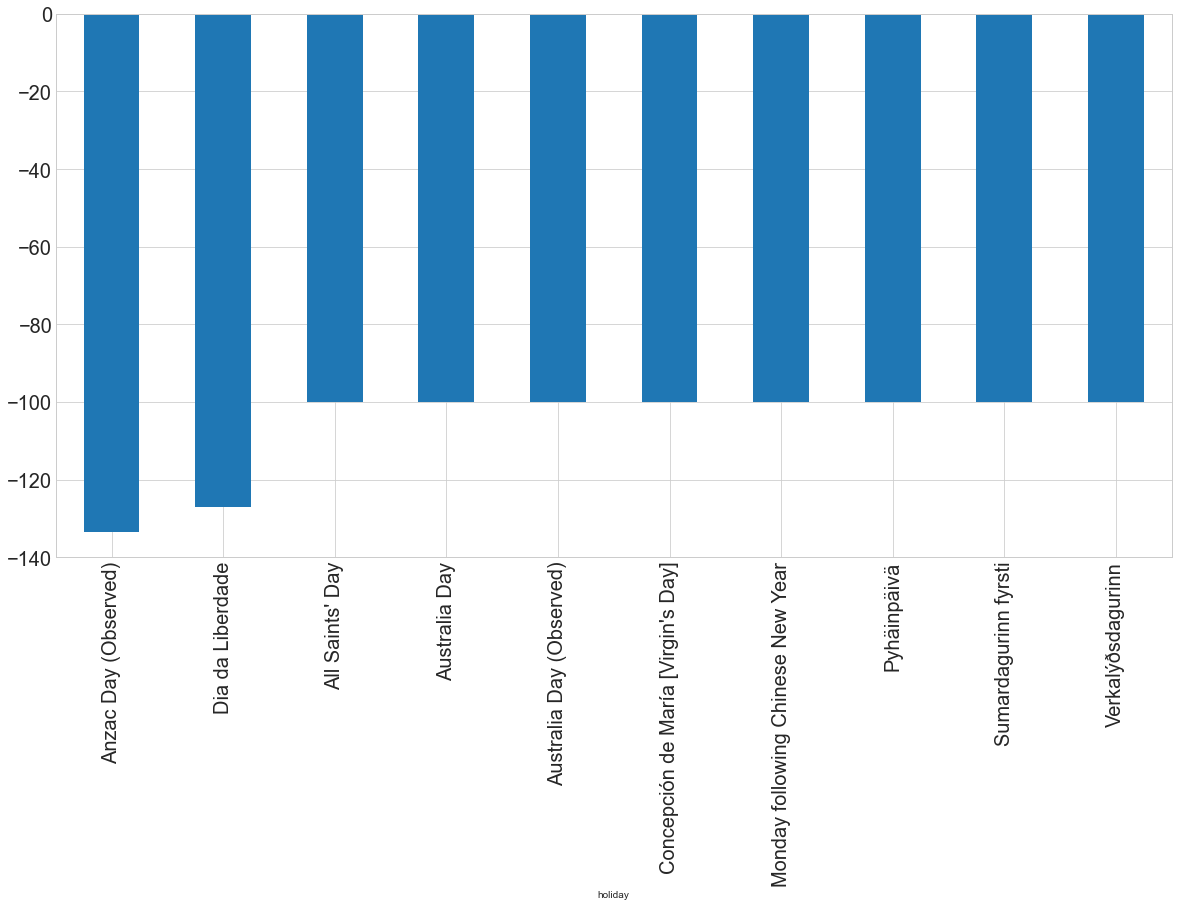

In [209]:
# Plot the bottom 10 holidays by average percent change
holiday_and_pct_change.nsmallest(10, "pct_change").plot(kind="bar", title="", figsize=(20,10), legend=False, fontsize=20)

The holidays that had the most significant decrease in COVID cases following a holiday celebration are indicated by the chart above. Anzac Day (observed), in particular, had a significant drop in covid cases 7 days after its holiday. This drop is greater than 100% though so what does that mean? Well, taking a closer look at the data from that particular holiday, we can see that the "new_cases" reported for Anzac day are reported as negative, likely because the government had to rerecord or make edits to their covid data from some previous mistakes. For any examples in this chart where the percentage change is greater than 100%, the covid new_cases reported 7 days later were negative values. Looking at the cell below, we can see that the change in cases was from 3 new cases to -1 new cases the week after. Although this is only a small change in quantity, it still has a greater than 100% change in the negative direction.

Thinking further about how this affects our dataset, we can understand that taking specific data from a particular day may not as reliable as using weighted averages or smoothed average new cases for that reason. If we were to redo this project, we would use the smoothed_average.

In [210]:
# find the number of holidays that have a positive percent change
print("number of positive percent change holidays" , holiday_and_pct_change[holiday_and_pct_change["pct_change"] > 0]["pct_change"].count())

# find the number of holidays that have a negative percent change
print("number of negative percent change holidays", holiday_and_pct_change[holiday_and_pct_change["pct_change"] < 0]["pct_change"].count())

# find the percentage of holidays that have a positive percent change
print("percentage of positive percent change holidays", holiday_and_pct_change[holiday_and_pct_change["pct_change"] > 0]["pct_change"].count() / holiday_and_pct_change.count())

# find the average of the percent change for all the holidays
print("average of percent change", holiday_and_pct_change["pct_change"].mean())

number of positive percent change holidays 293
number of negative percent change holidays 233
percentage of positive percent change holidays pct_change    0.547664
dtype: float64
average of percent change 36.19076752806357


There is a whole lot of net negative holiday percentage changes, so we did a little data digging above, and found out that 54% of the holidays are positive, with the rest being net negative on new covid cases over the course of the week after that date. However, taking the average of the percent change column shows that the holidays that are in the negative, are not as negative as the positive ones are positive, since the average percent change is a positive 35%.

One additional note to make about our averages is that they are NOT weighted based on case counts. We are only taking the mean of the different percentage changes, and if we were looking to have a more meaningful comparison of our data and the "average percent change in covid cases following a holiday" we would use the change in cases count as another variable for the weighted average to put emphasis on certain holidays that have much larger populations or changes in COVID cases. 